# website traffic -user behavior


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("website_traffic_user_behavior.csv")
df.head()


,user_id,session_id,date,page,time_spent_sec,traffic_source,device_type,country,is_new_user,converted
0,4174,32650,01-01-2024 00:00,Landing,554,Direct,Mobile,UK,0,0
1,4507,87701,01-01-2024 00:01,Support,312,Direct,Tablet,Australia,1,1
2,1860,20683,01-01-2024 00:02,Product,407,Direct,Mobile,UK,0,0
3,2294,69819,01-01-2024 00:03,Cart,654,Social Media,Mobile,UK,1,0
4,2130,14860,01-01-2024 00:04,Category,434,Organic Search,Desktop,Canada,0,0


In [4]:
df.info()
df.describe()
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         20000 non-null  int64 
 1   session_id      20000 non-null  int64 
 2   date            20000 non-null  object
 3   page            20000 non-null  object
 4   time_spent_sec  20000 non-null  int64 
 5   traffic_source  20000 non-null  object
 6   device_type     20000 non-null  object
 7   country         20000 non-null  object
 8   is_new_user     20000 non-null  int64 
 9   converted       20000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [5]:
df = df[df['time_spent_sec'] > 3]
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         20000 non-null  int64 
 1   session_id      20000 non-null  int64 
 2   date            20000 non-null  object
 3   page            20000 non-null  object
 4   time_spent_sec  20000 non-null  int64 
 5   traffic_source  20000 non-null  object
 6   device_type     20000 non-null  object
 7   country         20000 non-null  object
 8   is_new_user     20000 non-null  int64 
 9   converted       20000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df.isnull().sum()


user_id           0
session_id        0
date              0
page              0
time_spent_sec    0
traffic_source    0
device_type       0
country           0
is_new_user       0
converted         0
day               0
month             0
dtype: int64

In [11]:
page_per_session = (
    df.groupby('session_id')['page']
    .count()
    .reset_index(name='page_count')
)
df = df.merge(page_per_session, on='session_id')
df['is_bounce'] = np.where(df['page'] == 1, 1, 0)



In [12]:
total_users = df['user_id'].nunique()
total_sessions = df['session_id'].nunique()

total_users, total_sessions


(3965, 17642)

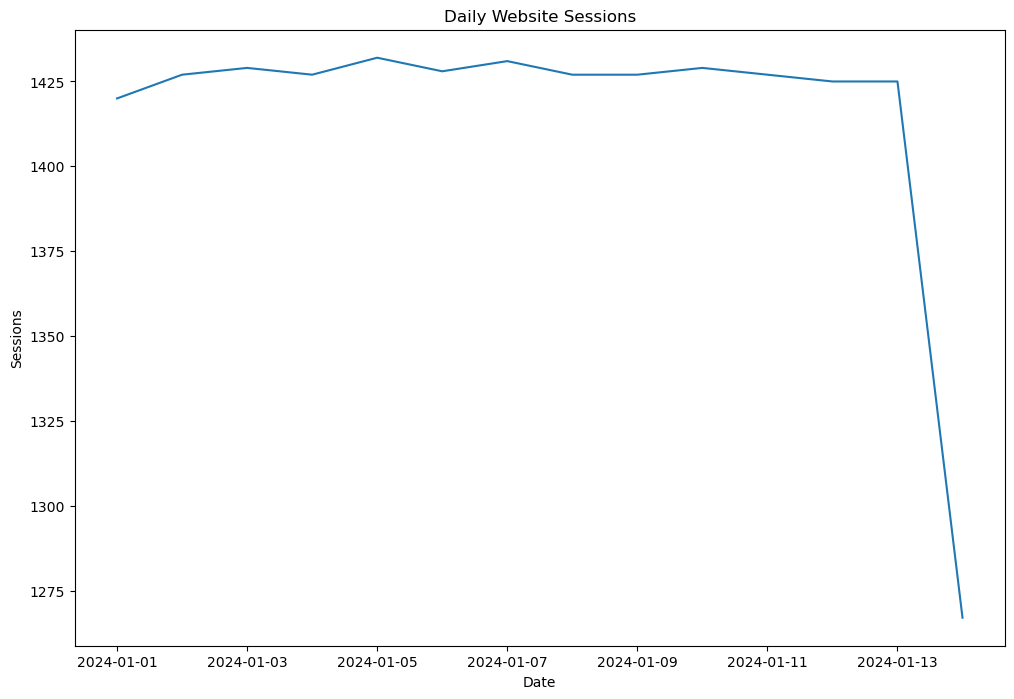

In [14]:
daily_sessions = df.groupby('day')['session_id'].nunique()

plt.figure(figsize=(12,8))
daily_sessions.plot()
plt.title("Daily Website Sessions")
plt.xlabel("Date")
plt.ylabel("Sessions")
plt.show()


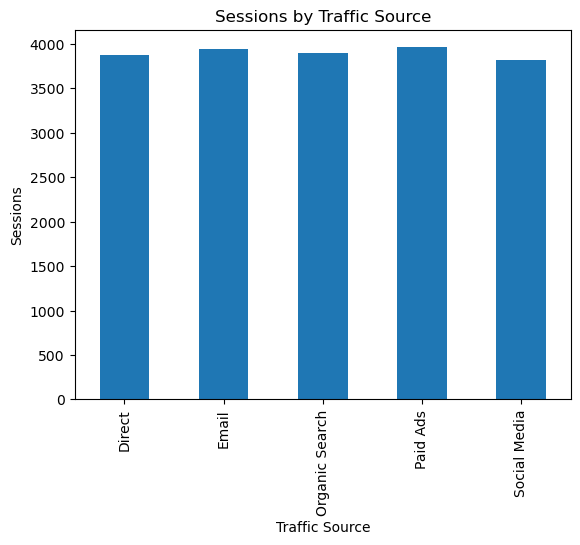

In [15]:
source_sessions = df.groupby('traffic_source')['session_id'].nunique()

plt.figure()
source_sessions.plot(kind='bar')
plt.title("Sessions by Traffic Source")
plt.xlabel("Traffic Source")
plt.ylabel("Sessions")
plt.show()


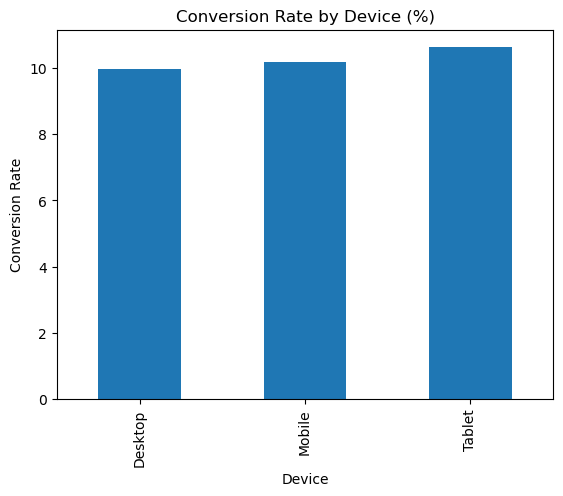

In [16]:
device_conversion = df.groupby('device_type')['converted'].mean() * 100

plt.figure()
device_conversion.plot(kind='bar')
plt.title("Conversion Rate by Device (%)")
plt.xlabel("Device")
plt.ylabel("Conversion Rate")
plt.show()


In [17]:
bounce_rate = df['is_bounce'].mean() * 100
bounce_rate


0.0

In [19]:
page_exit = df.groupby('page')['is_bounce'].mean() * 100
page_exit.sort_values(ascending=False)


page
Cart        0.0
Category    0.0
Checkout    0.0
Landing     0.0
Product     0.0
Profile     0.0
Support     0.0
Name: is_bounce, dtype: float64

In [20]:
funnel = df.groupby('page')['session_id'].nunique()
funnel


page
Cart        2868
Category    2714
Checkout    2747
Landing     2737
Product     2877
Profile     2856
Support     2821
Name: session_id, dtype: int64

• Mobile users have lower conversion than Desktop 

• Product and Cart pages show high drop-off

• Paid Ads bring traffic but lower conversion than Organic


In [21]:
df.to_csv("clean_website_traffic.csv", index=False)
